In [13]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd

In [14]:
!pwd

/ocean/projects/atm200007p/jlin96/skynet_proj/HPO/baseline_v1/step3_evaluation


In [15]:
"/ocean/projects/atm200007p/jlin96/skynet_proj/HPO/baseline_v1/step2_retrain/"

'/ocean/projects/atm200007p/jlin96/skynet_proj/HPO/baseline_v1/step2_retrain/'

In [16]:
metrics_path = "/ocean/projects/atm200007p/jlin96/skynet_proj/HPO/baseline_v1/step2_retrain/"
phase1_path = metrics_path + "backup_phase-1_retrained_models/metrics/"
phase2_path = metrics_path + "backup_phase-2_retrained_models/metrics/"
phase3_path = metrics_path + "backup_phase-3_retrained_models/metrics/"

In [31]:
def unix_command(*args):
    os.system(" ".join(list(args)))

def ls(data_path = ""):
    return os.popen(" ".join(["ls", data_path])).read().splitlines()

def get_results(metrics_path):
    flist = [metrics_path + x for x in ls(metrics_path)]
    RESULTS={}
    for k, kf in enumerate(flist): # kf = f_csv
        RESULTS[k] = {}
        RESULTS[k]['lot'] = kf.split('_')[-3]
        RESULTS[k]['trial'] =  kf.split('_')[-2] + '-' +  kf.split('_')[-1].split('.')[0]
        RESULTS[k]['fn'] = kf.split('/')[-1]

        # collect csv data
        work = pd.read_csv(kf)
        RESULTS[k]['val_loss'] = work['val_loss'].to_numpy()
        RESULTS[k]['min_val_loss'] = work['val_loss'].min()
        RESULTS[k]['epoch'] = work['epoch']
        RESULTS[k]["dataframe"] = work
    return RESULTS

In [32]:
phase1_results = get_results(phase1_path)
phase2_results = get_results(phase2_path)
phase3_results = get_results(phase3_path)

In [38]:
phase1_mins = [phase1_results[i]["min_val_loss"] for i in range(len(phase1_results))]
phase2_mins = [phase2_results[i]["min_val_loss"] for i in range(len(phase2_results))]
phase3_mins = [phase3_results[i]["min_val_loss"] for i in range(len(phase3_results))]

In [57]:
complete_mins = phase1_mins + phase2_mins + phase3_mins
lowest_min = min(complete_mins)
largest_min = max(complete_mins)


([<matplotlib.axis.XTick at 0x14982cda7c40>,
 <a list of 5 Text major ticklabel objects>)

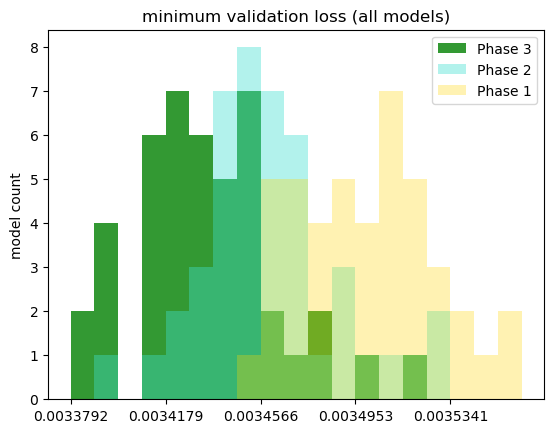

In [155]:
num_bins = 20
spacing = np.linspace(lowest_min, largest_min, num_bins)
plt.hist(phase3_mins, density = False, bins = spacing, alpha = .8, color = "green")
plt.hist(phase2_mins, density = False, bins = spacing, alpha = .4, color = "turquoise")
plt.hist(phase1_mins, density = False, bins = spacing, alpha = .3, color = "gold")


plt.legend(["Phase 3", "Phase 2", "Phase 1"])
plt.title("minimum validation loss (all models)")
plt.ylabel("model count")
plt.xticks(spacing[::4])

In [141]:
best_indices = [i for i in range(len(phase3_results)) if phase3_results[i]["min_val_loss"] < .0034]

In [146]:
lot_trial_ids = []
for index in best_indices:
    print(phase3_results[index]["lot"], phase3_results[index]["trial"])
    lot_trial_ids = lot_trial_ids + [phase3_results[index]["lot"] + " " + phase3_results[index]["trial"]]

lot-29 trial-0144
lot-31 trial-0030
lot-39 trial-0099
lot-41 trial-0100
lot-42 trial-0023
lot-45 trial-0049


In [147]:
lot_trial_ids

['lot-29 trial-0144',
 'lot-31 trial-0030',
 'lot-39 trial-0099',
 'lot-41 trial-0100',
 'lot-42 trial-0023',
 'lot-45 trial-0049']

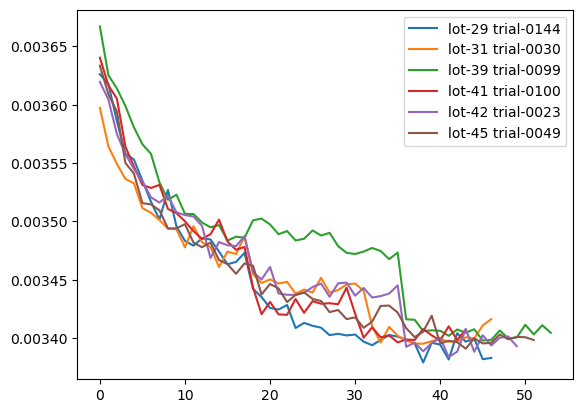

In [152]:
fig, ax = plt.subplots()
for index in best_indices:
    ax.plot(phase3_results[index]["val_loss"])
ax.legend(lot_trial_ids)

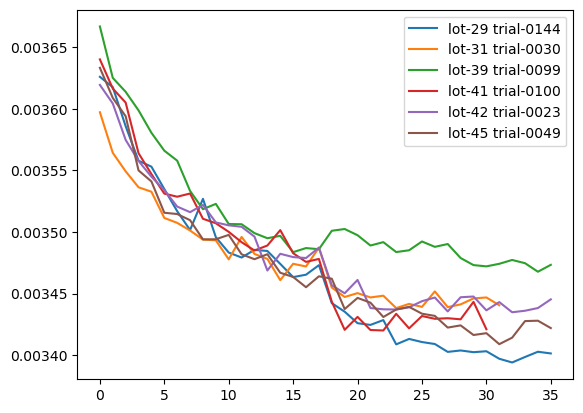

In [153]:
fig, ax = plt.subplots()
for index in best_indices:
    ax.plot(phase2_results[index]["val_loss"])
ax.legend(lot_trial_ids)

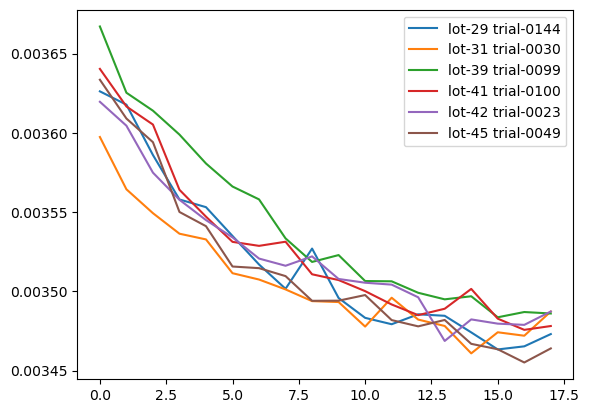

In [154]:
fig, ax = plt.subplots()
for index in best_indices:
    ax.plot(phase1_results[index]["val_loss"])
ax.legend(lot_trial_ids)

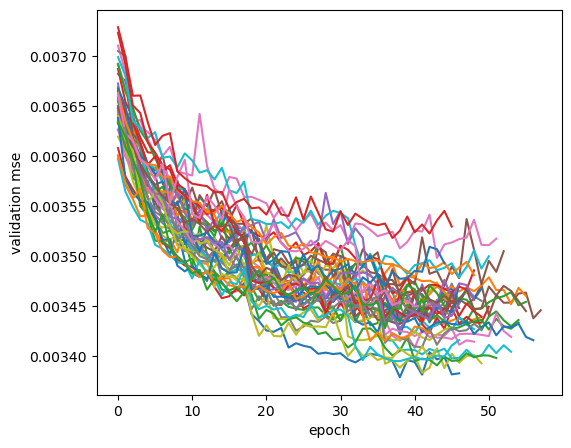

In [3]:
# Showing all top 44 models

fig, ax = plt.subplots()
for k in RESULTS.keys():
    plotdata = RESULTS[k]
    ax.plot(plotdata['val_loss'],label=k)
    
    # dahsed black line:
    # shows "when training was stopped and resumed"
    if False:
        ind_resume = plotdata['epoch'].loc[plotdata['epoch'] ==0 ].index[-1]
        ax.axvline(ind_resume, color='k', ls='--')
    
ax.set_xlabel('epoch')
ax.set_ylabel('validation mse')
fig.set_size_inches(6,5)

/tmp/ipykernel_77146/3290227804.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/tmp/ipykernel_77146/3290227804.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/tmp/ipykernel_77146/3290227804.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(

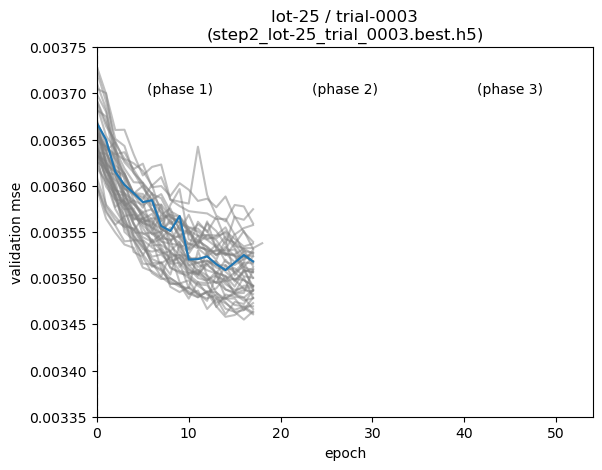

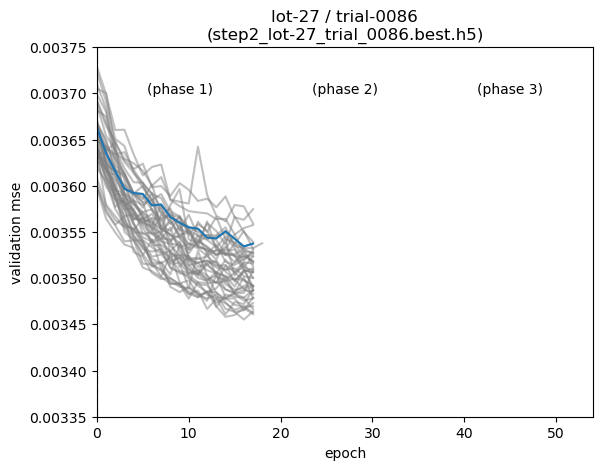

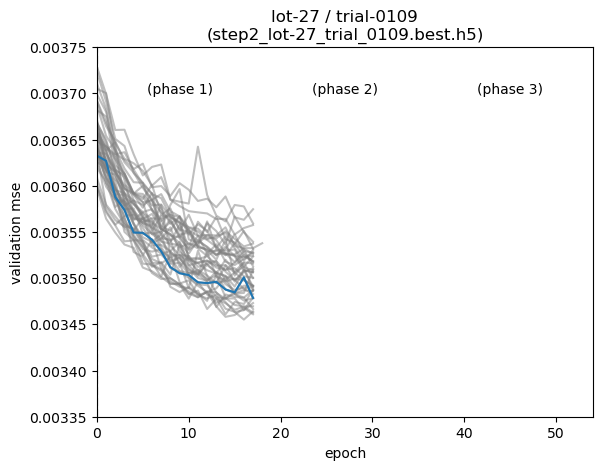

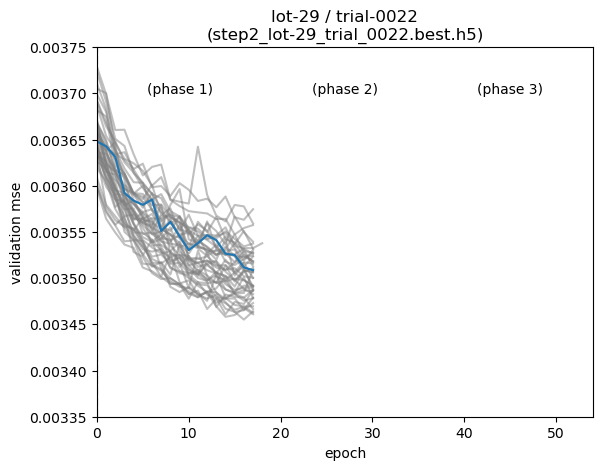

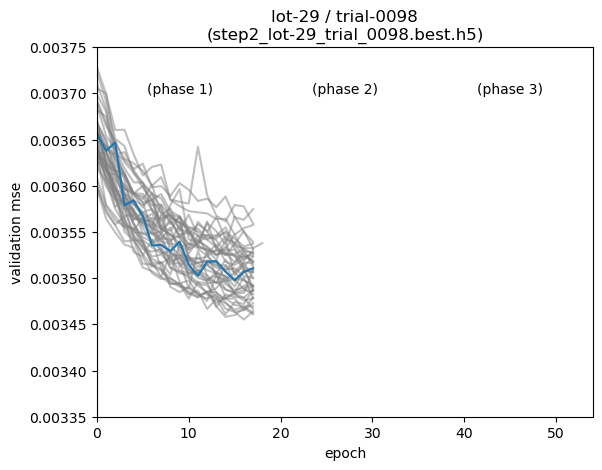

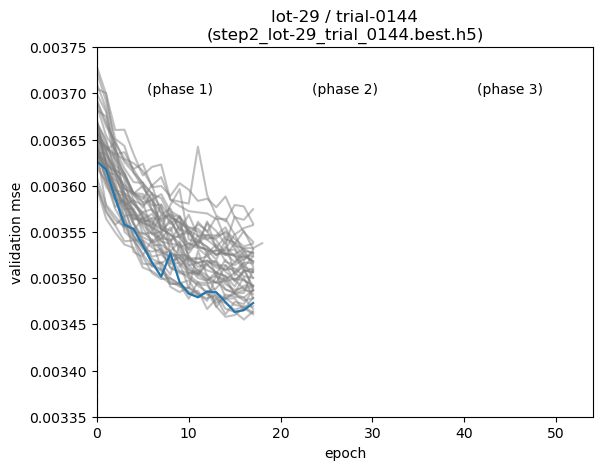

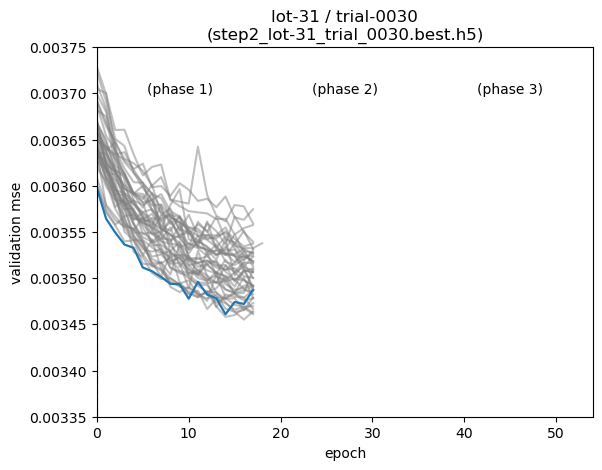

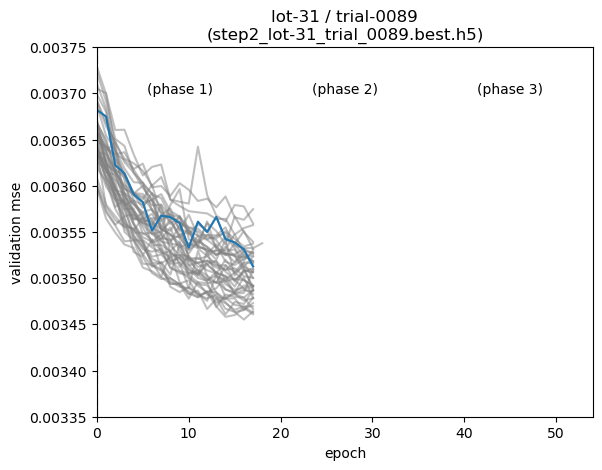

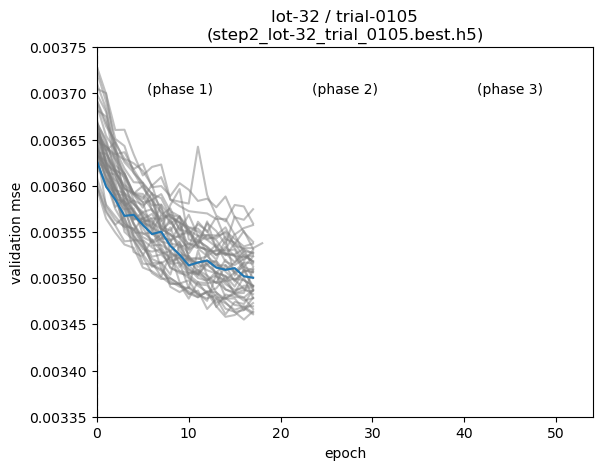

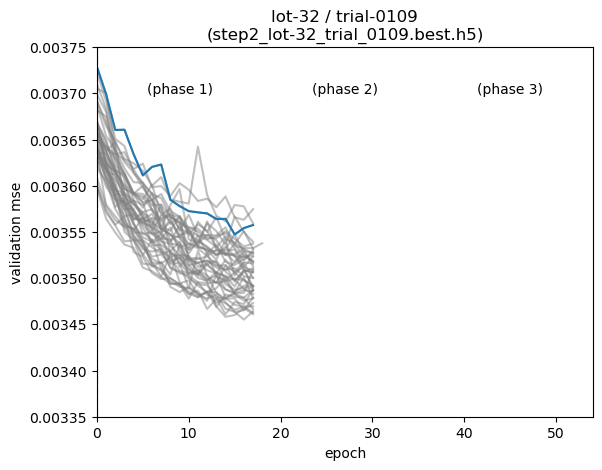

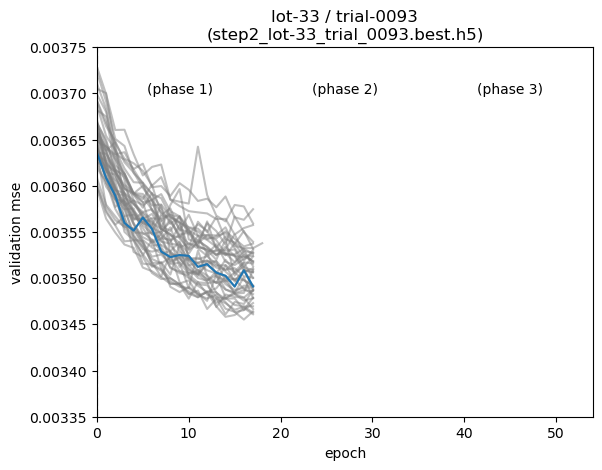

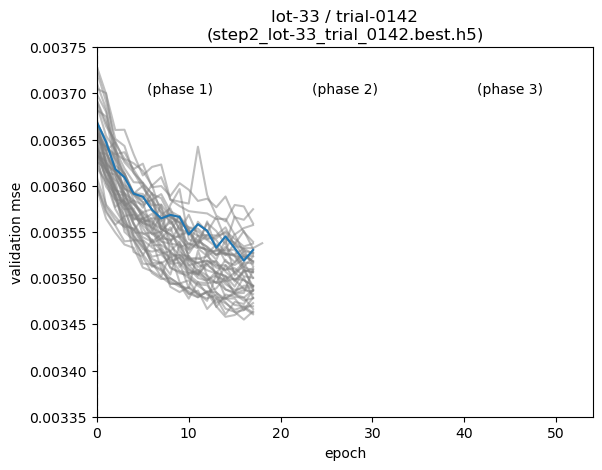

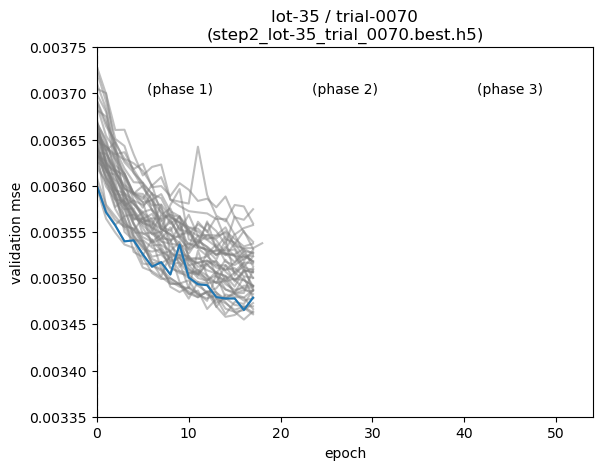

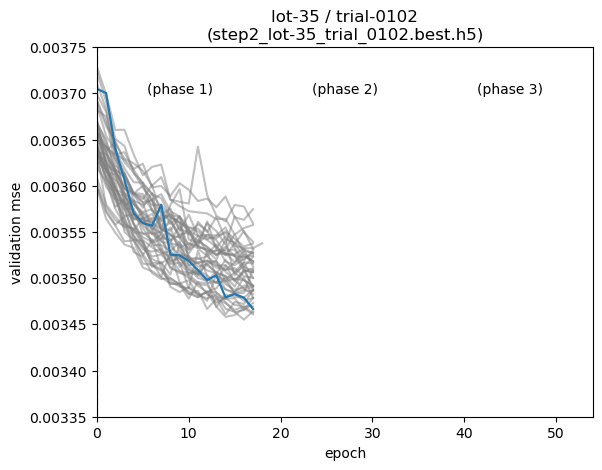

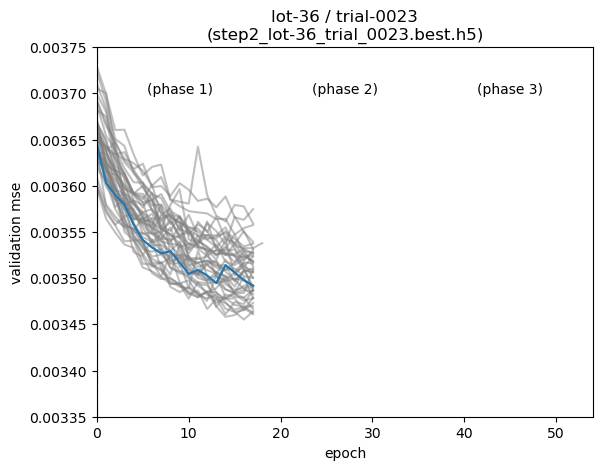

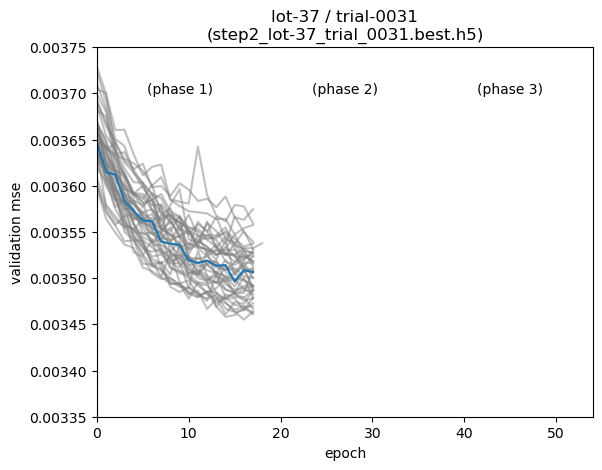

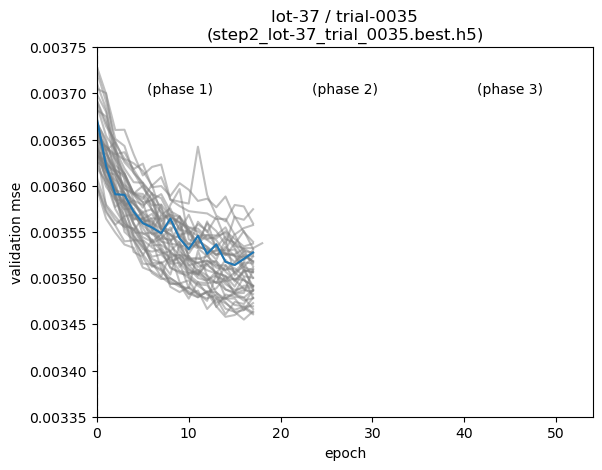

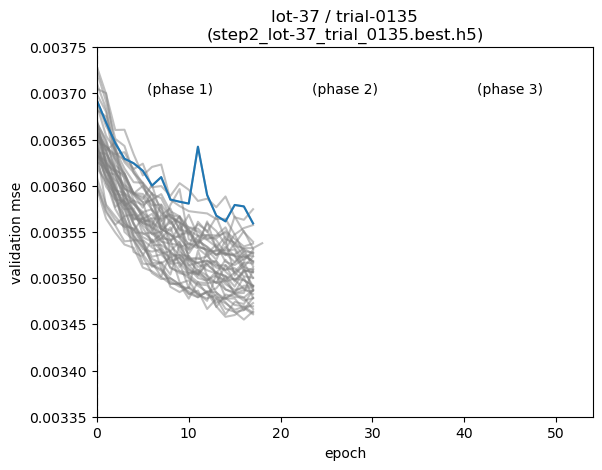

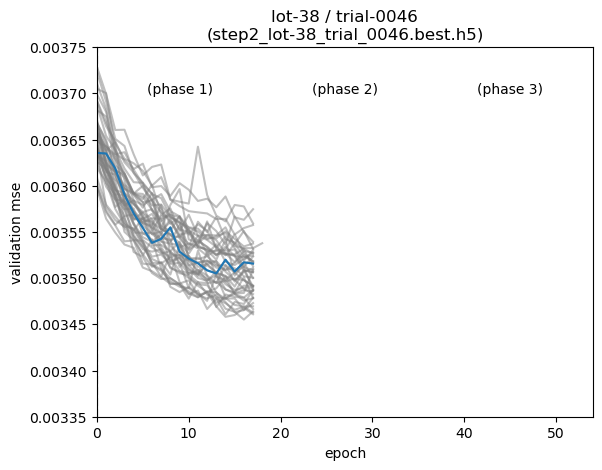

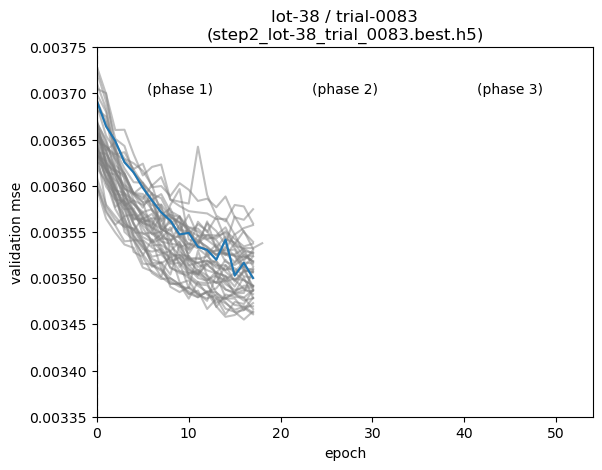

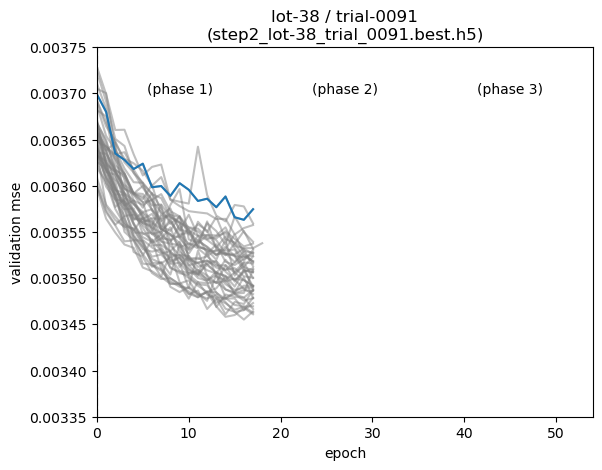

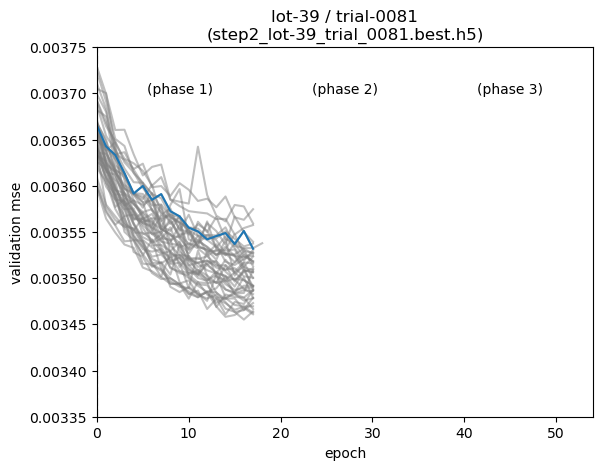

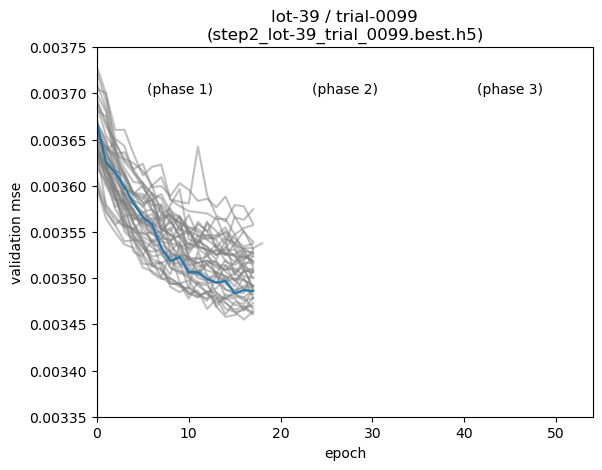

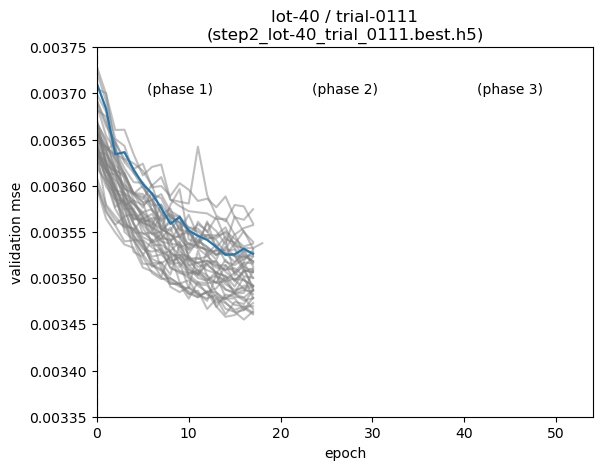

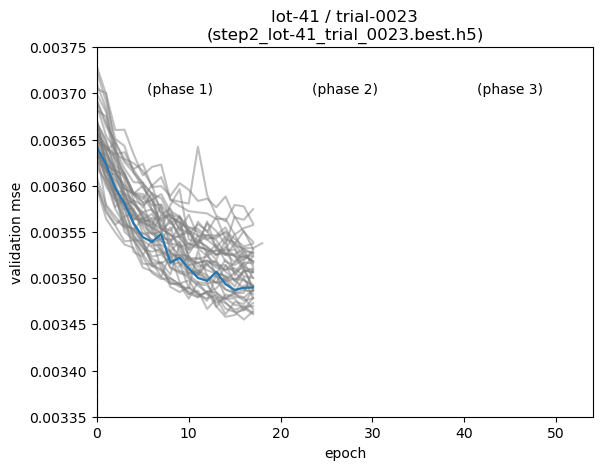

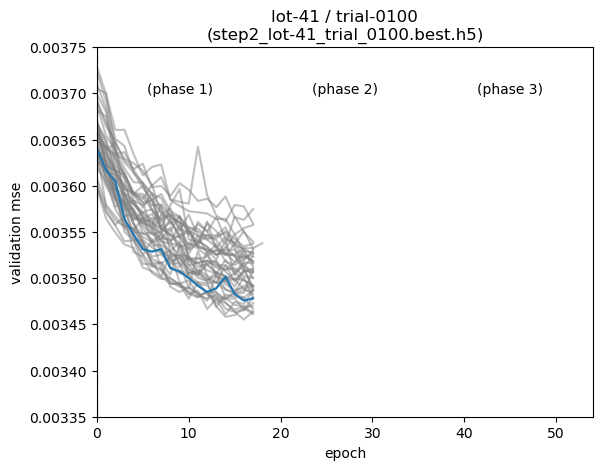

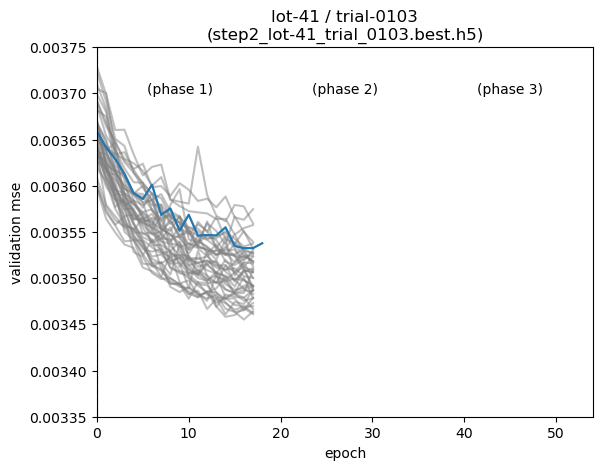

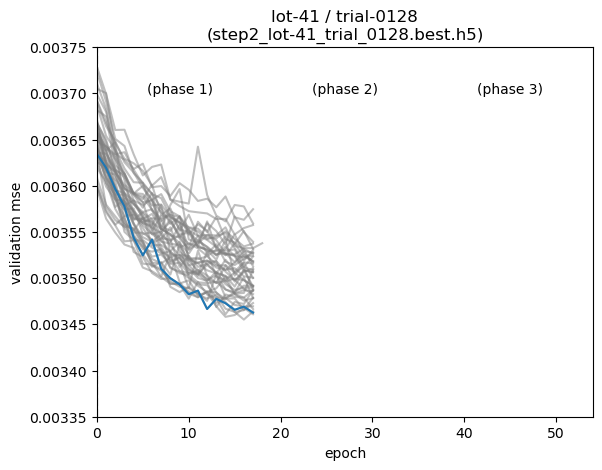

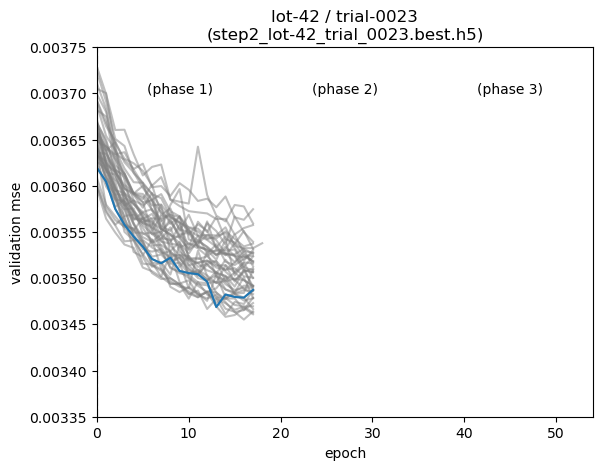

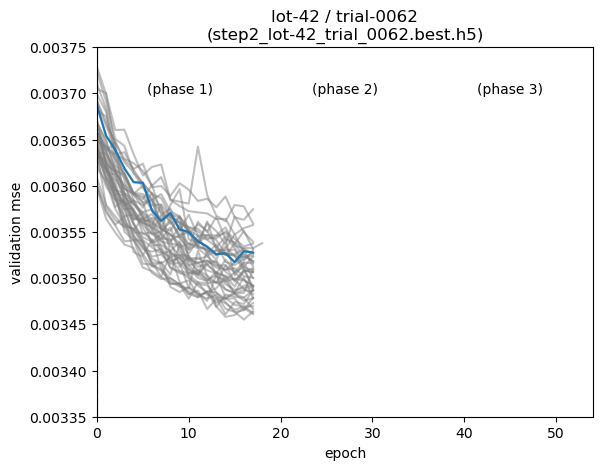

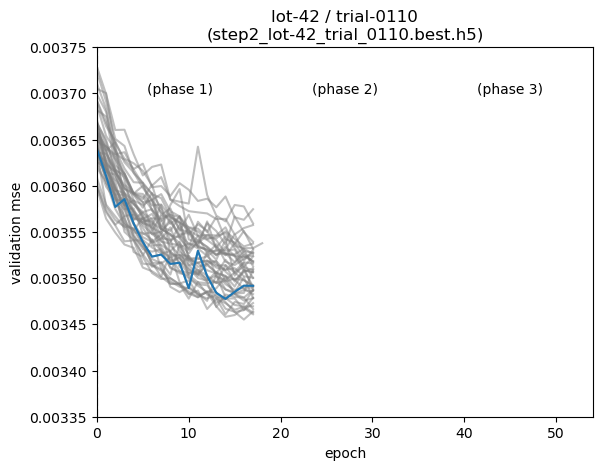

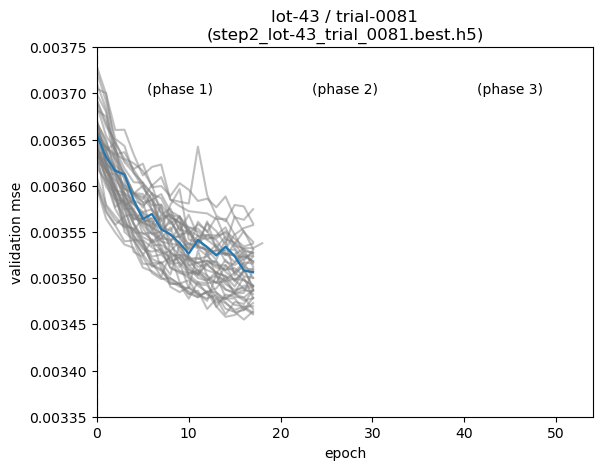

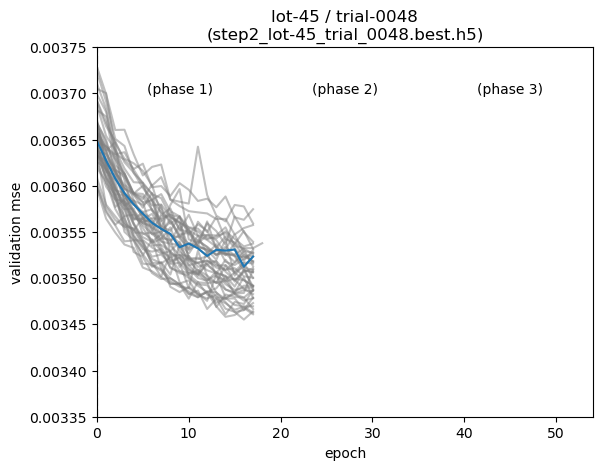

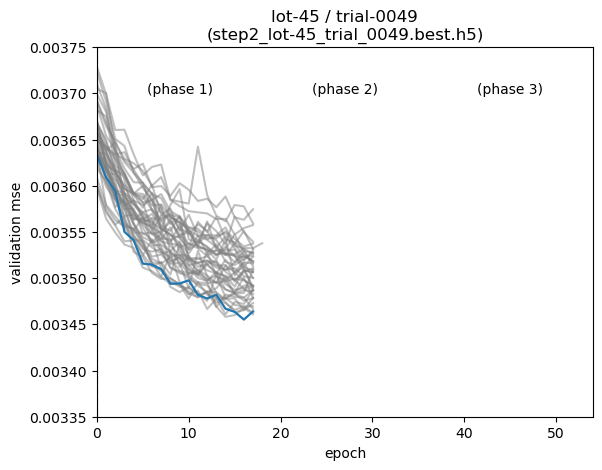

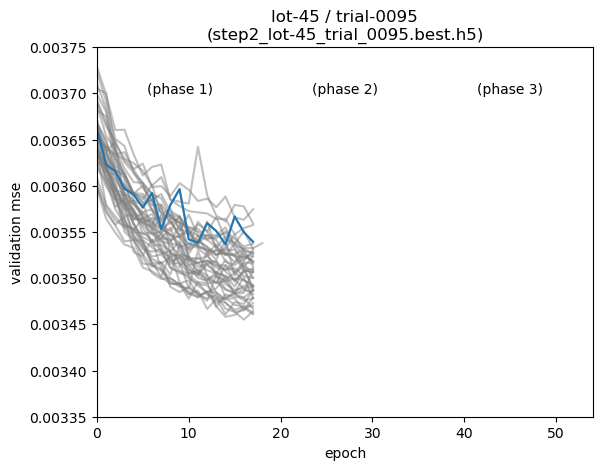

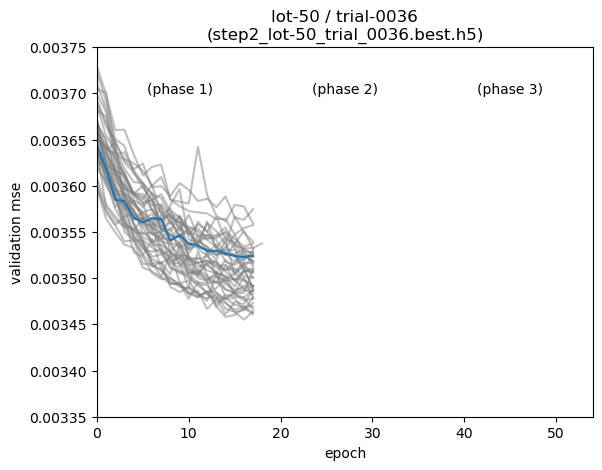

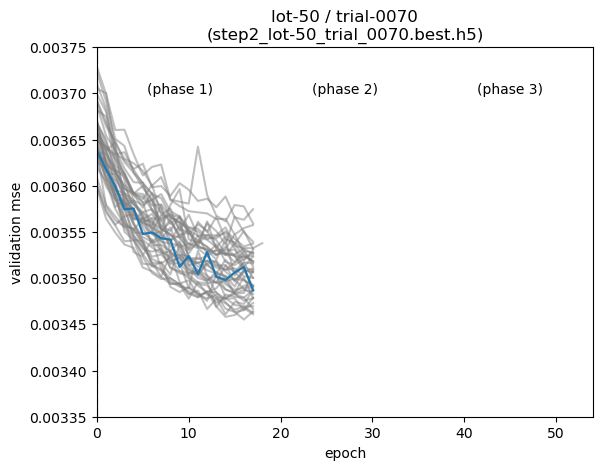

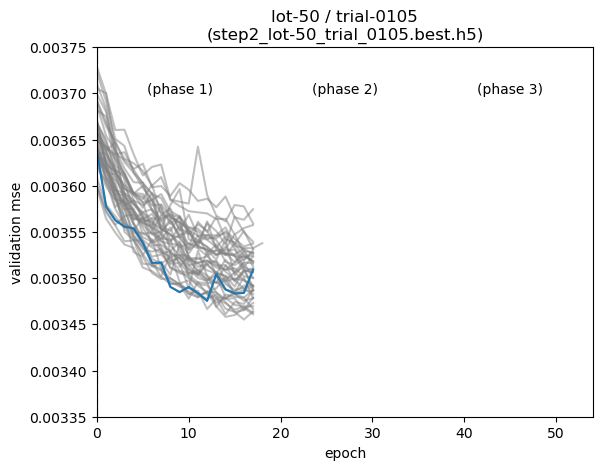

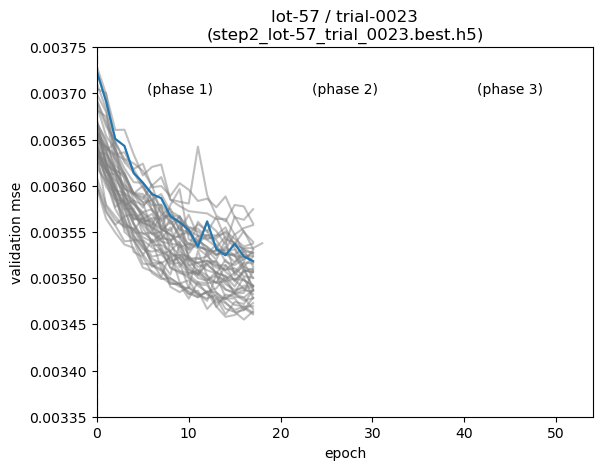

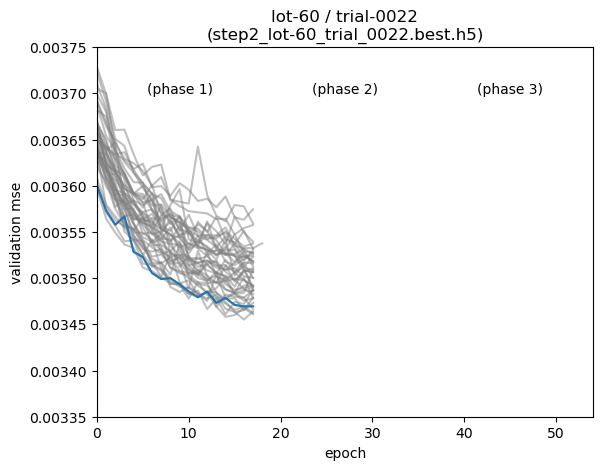

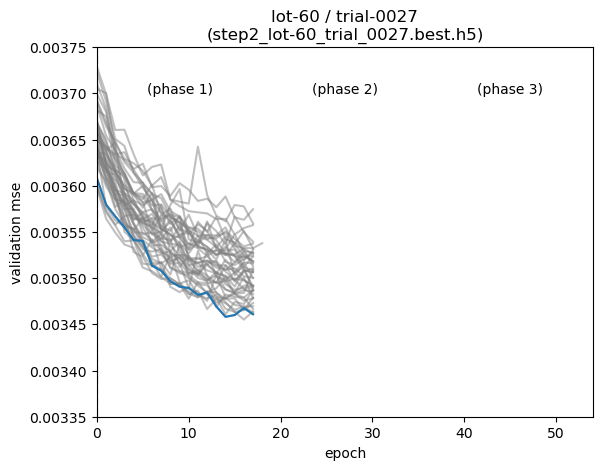

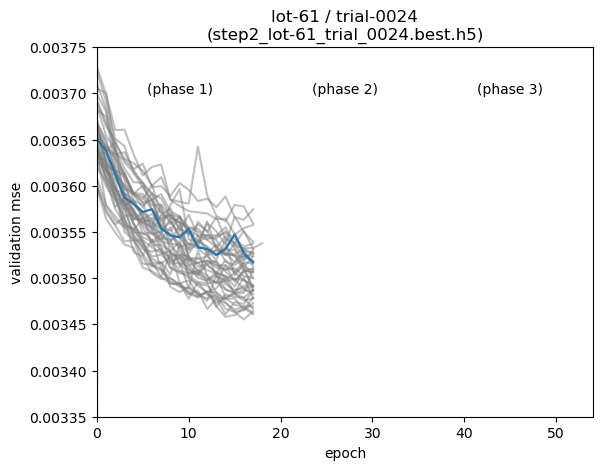

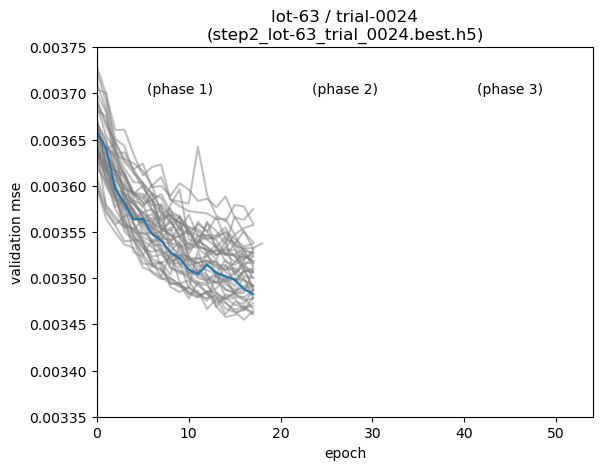

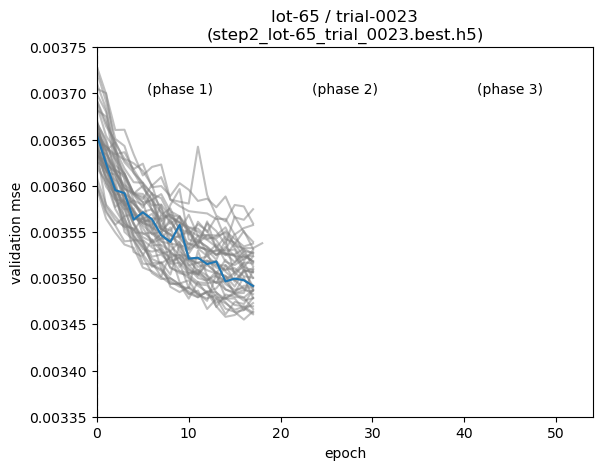

In [115]:
# showing each model individually

for k in RESULTS.keys():
    fig, ax = plt.subplots()
    
    for kgrey in RESULTS.keys():
        plotdata = RESULTS[kgrey]
        ax.plot(plotdata['val_loss'],color='grey',alpha=.5)
    
    plotdata = RESULTS[k]
    ax.plot(plotdata['val_loss'],label=k)
    ax.set_title(f"{plotdata['lot']} / {plotdata['trial']}\n"+
                 f"({plotdata['fn'].replace('metrics.csv','best.h5')})")
    ax.set_xlabel('epoch')
    ax.set_ylabel('validation mse')
    
    # dahsed black line:
    # shows "when training was stopped and resumed"
    for ind_resume in plotdata['epoch'].loc[plotdata['epoch'] ==0 ].index[-2:]:
        ax.axvline(ind_resume, color='k', ls='--')
    
    # text
    ax.text(9, 0.0037, '(phase 1)', ha='center')
    ax.text(27,0.0037, '(phase 2)', ha='center')
    ax.text(45,0.0037, '(phase 3)', ha='center')
    
    ax.set_xlim(0,54)
    ax.set_ylim(0.00335, 0.00375)

In [117]:
!pwd

/ocean/projects/atm200007p/jlin96/skynet_proj/HPO/baseline_v1/step3_evaluation
